In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Setting pandas display all columns options to ON
pd.options.display.max_columns=999
pd.options.display.max_rows=1999

# Setting Numpy suppress scientific notation to ON
np.set_printoptions(suppress=True)

In [4]:
# REading the first segment of 39A Inbound = 767_768
colnames=['arrivaltime', 'traveltime', 'segmentid', 'dayofweek','rain','temp']
df = pd.read_csv('39A_segments\\39A_segments\\767_768.csv',names=colnames)

In [5]:
df.drop('segmentid',axis=1,inplace=True)

In [6]:
#We need to convert only one column
df['dayofweek'] = df['dayofweek'].astype('category')

In [7]:
cont_description = df.select_dtypes(['int64','float64']).describe().T
miss=[]
for i,m in enumerate(df.select_dtypes(['int64','float64']).columns):
    miss.append(100-((cont_description['count'][i]/df.select_dtypes(['int64','float64']).shape[0])*100))
cont_description['% miss']=miss

In [8]:
# Data Quality Report
category_desc = df.select_dtypes(['category']).describe().T
miss=[]
freq=[]
for i,cols in enumerate(df.select_dtypes(['category']).columns):
    miss.append(100-((category_desc['count'][i]/df.select_dtypes(['category']).shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df.select_dtypes(['category']).columns:
    df_temp = df.select_dtypes(['category'])[cols].value_counts()
    card = len(df.select_dtypes(['category'])[cols].unique().dropna())
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

,count,unique,top,freq,% topFreq,% miss,sec mode,sec mode freq
dayofweek,5792,7,Tuesday,1021,17.627762,0.0,Wednesday,1017


In [9]:
df_continuous_columns = df.select_dtypes(['int64','float64'])
df_categorical_columns = df.select_dtypes(['category'])

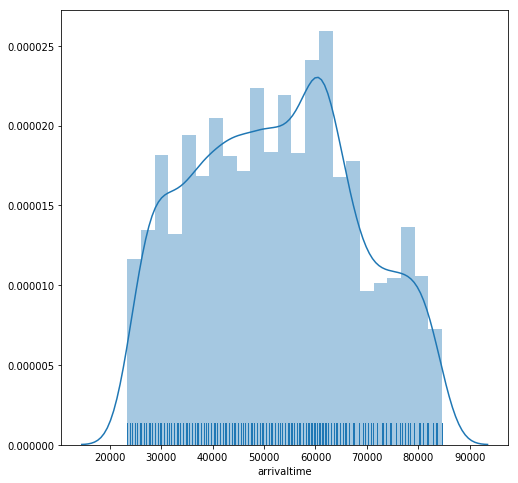

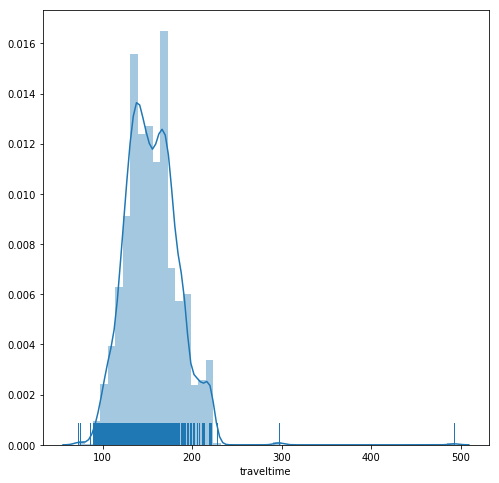

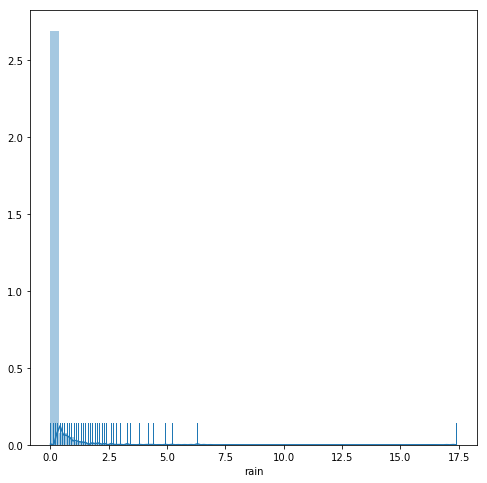

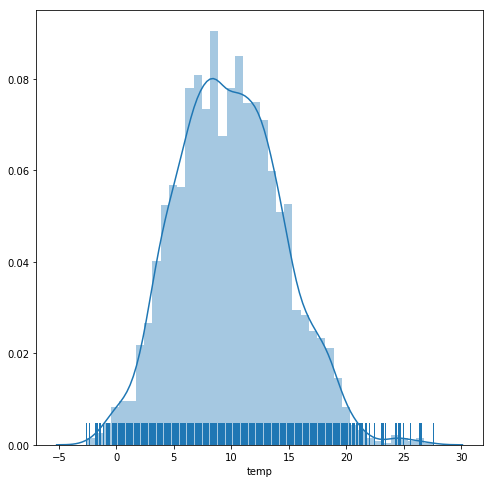

In [12]:
for col in df_continuous_columns.columns:
    #print(col)
    plt.figure()
    f,ax = plt.subplots(figsize=(8,8))
    sns.distplot(df_continuous_columns[col].dropna(), rug=True)
    plt.savefig('Figures\\{}_distribution.png'.format(col),transparent=True)

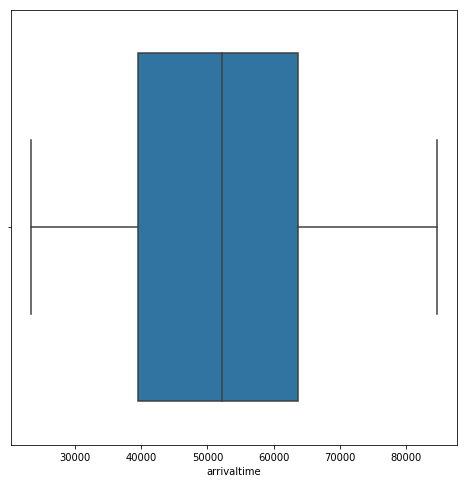

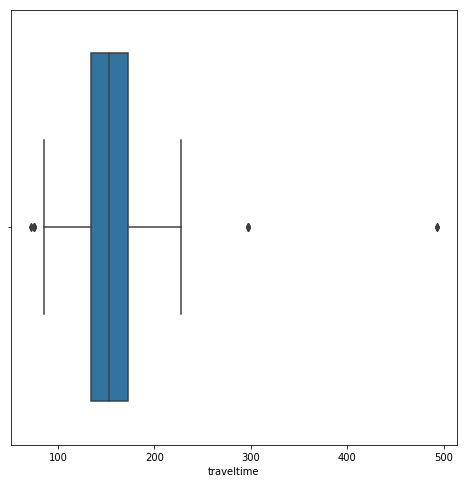

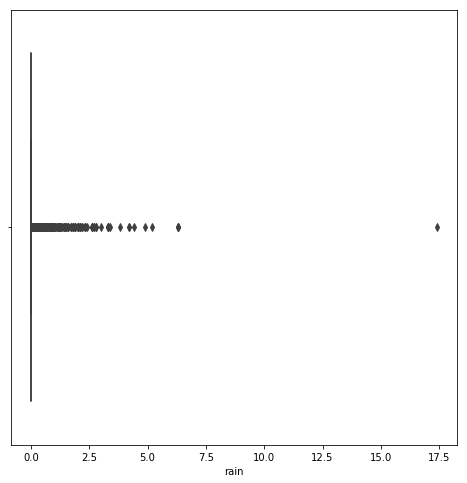

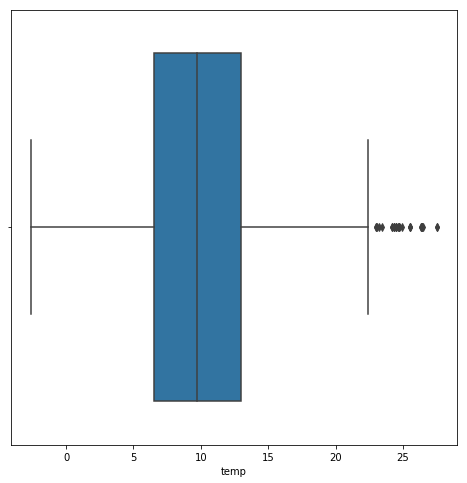

In [13]:
for col in df_continuous_columns.columns:
    #print(col)
    plt.figure()
    f,ax = plt.subplots(figsize=(8,8))
    sns.boxplot(x=df_continuous_columns[col])
    plt.savefig('Figures\\{}_boxplot.png'.format(col),transparent=True)

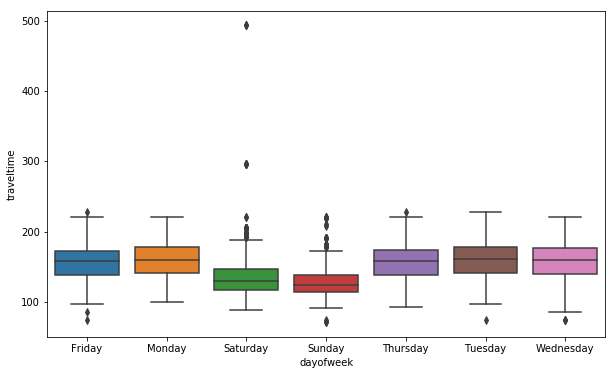

In [20]:
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="dayofweek", y="traveltime", data=df)
plt.savefig('Figures\\dayofweekvstraveltime_planned.png',transparent=True)